## Analysis of the U.N.'s Data for number of deaths per country in 1990 and 2012

We will be analyzing the U.N.'s dataset containing the number of deaths in a country per 1000 people from age 15 to 60. 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
# Creating the DataFrames from the raw data

#reading the csv of U.N.'s Data for number of deaths per country' 
df = pd.read_csv('UNdata_Export_20181205_064927810.csv')

#initializing list of countries in alphabetical order
country_2012_bs = []

#initializing death count value associated with that country for the year 2012. 
#The data was given with values for male deaths, female deaths and both sexes. 
#We will only analyse the count for both sexes, hence "bs"
value_2012_bs = []

#loop through the raw data to extract the one value associated with a country. Both sexes count in the year 2012.
for i in df.index:
    if df.loc[i,'Year(s)'] == 2012 and df.loc[i,'GENDER'] == "Both sexes":
        country_2012_bs.append(df.loc[i,'Country or Area'])
        value_2012_bs.append(df.loc[i,'Value'])
   
     
#create a dataframe for this extracted data
#the index is the country name
#the one and only one column is the death count
df_2012_bs = pd.DataFrame(index=country_2012_bs)
df_2012_bs['2012 Both Sexes Value'] = value_2012_bs


#Same code but now for the year 1990 instead of 2012
country_1990_bs = []
value_1990_bs = []

for i in df.index:
    if df.loc[i,'Year(s)'] == 1990 and df.loc[i,'GENDER'] == "Both sexes":
        country_1990_bs.append(df.loc[i,'Country or Area'])
        value_1990_bs.append(df.loc[i,'Value'])
   
  
df_1990_bs = pd.DataFrame(index=country_1990_bs)
df_1990_bs['1990 Both Sexes Value'] = value_1990_bs

#creating a data frame for the change in death count per country from 1990 to 2012. 
value_diff_bs = []
for i in range(0,len(value_2012_bs)):
    value_diff_bs.append(value_2012_bs[i] - value_1990_bs[i])

df_diff_bs = pd.DataFrame(index=country_1990_bs)
df_diff_bs['Difference in Death Counts'] = value_diff_bs  


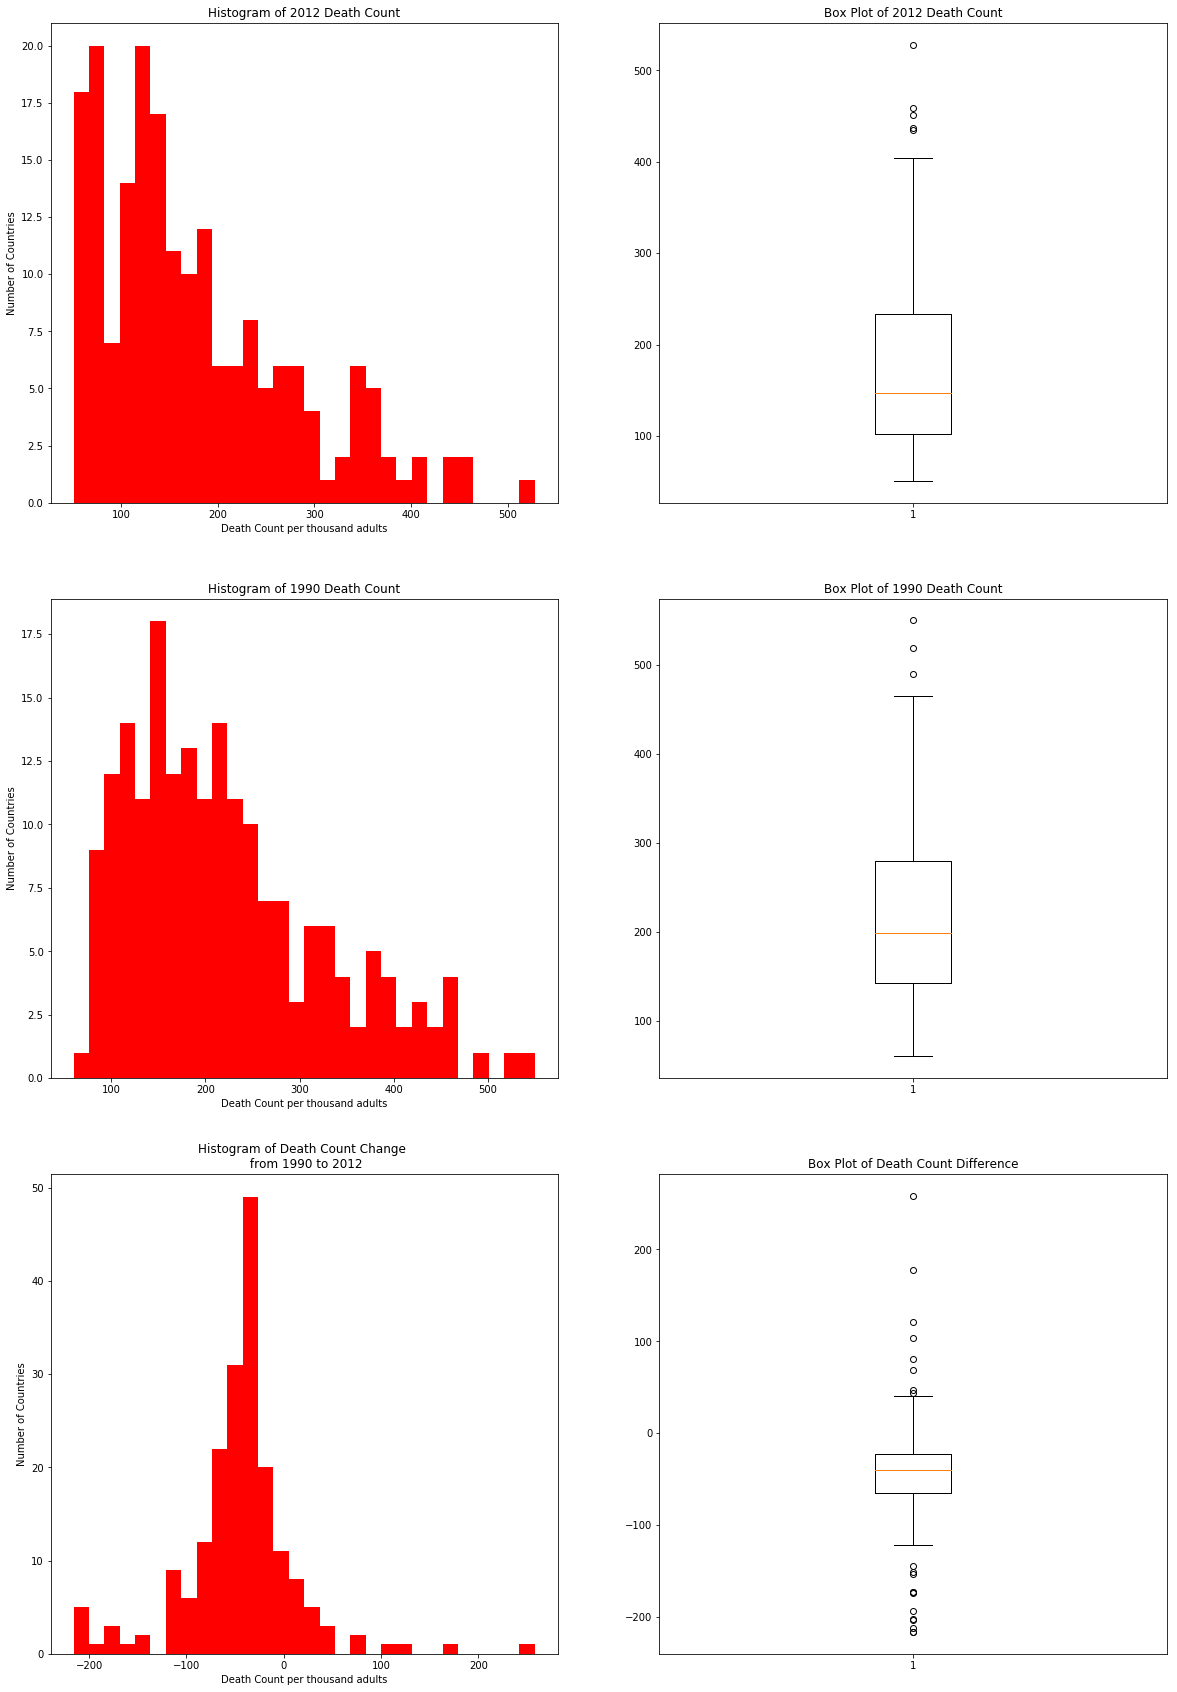

In [65]:
# Making the figure

plt.figure(figsize=(20, 30))

subplot_rows = 3
subplot_columns = 2

plt.subplot(subplot_rows, subplot_columns, 1)
plt.hist(value_2012_bs, bins=30, color='red')
plt.title('Histogram of 2012 Death Count')
plt.xlabel('Death Count per thousand adults')
plt.ylabel('Number of Countries')


plt.subplot(subplot_rows, subplot_columns, 2)
plt.boxplot(value_2012_bs)
plt.title('Box Plot of 2012 Death Count')

plt.subplot(subplot_rows, subplot_columns, 3)
plt.hist(value_1990_bs, bins=30, color='red')
plt.title('Histogram of 1990 Death Count')
plt.xlabel('Death Count per thousand adults')
plt.ylabel('Number of Countries')


plt.subplot(subplot_rows, subplot_columns, 4)
plt.boxplot(value_1990_bs)
plt.title('Box Plot of 1990 Death Count')

  

plt.subplot(subplot_rows, subplot_columns, 5)
plt.hist(value_diff_bs, bins=30, color='red')
plt.title('Histogram of Death Count Change \n from 1990 to 2012')
plt.xlabel('Death Count per thousand adults')
plt.ylabel('Number of Countries')


plt.subplot(subplot_rows, subplot_columns, 6)
plt.boxplot(value_diff_bs)
plt.title('Box Plot of Death Count Difference')



plt.show()

## The 2012 Plots

From the histogram, we can see that this data is following a Poissonian Distrobution. The mean value of deaths is far closer to the minimum value that it is to the maximum value. There are a couple outliers whose death count is far higher than most countries. The box plot shows this nicely. There are no low-value outliers (represented by those circles called "fliers"). However, there are several high-value outliers. 



## The 1990 Plots 

The general shape of the 1990 histogram is the same as the 2012 histogram. The differences in the two datasets is most easily seen in the box plots. A notable difference is that the mean value of the 1990 death count is larger than that of the 2012 death count. I at first thought this meant that less people are dying on average, but I realized that's not correct. If we had a world made of two counties, one with a billion people and another with ten people, these two counties would be weighed the same in these plots. One person is in small country is weighed same as 100,000,000 people in the big country. So, the change in the mean of our data says that the average number of deaths per country has decreased. We can't make a statement about the world's population as a whole. 



## The Change from 1990 to 2012 Plots

This histogram is not a Poissonian Distrobution. I'm not sure what it's called, but is roughly symmetric about its mean. As we would expect from our analysis of the means of the two previous datasets, the mean of this data is negative. Contries on average have become "safer." Also, we now have outliers on both sides of the box plot. Some counties have become much more "safe" and others much more "dangerous" than the average country. Lastly from the boxplot we see that the IQR is about 50 units wide. Thus, the countries within the IQR deviate from the mean by roughly 2.5% or less. We know this beause the IQR box is roughly symmetric about the mean and it is 50 units wide. Thus, the boxes edges are roughly 25 units from the mean. 25 units is 25 people per 1000 people. 25/1000 = 0.025 or 2.5%. Seems as though we do not have a high standard deviation here, just a few outliers. 


Below we see some superlatives of the datasets.

In [67]:

#Let's see who are the winners of each catagory...
#again the value given is the average number of deaths (age 15 to 60) for 1000 individuals. 
#(e.g. 500 represents that half the population died that year.)

#The most deadly country in 1990 is Zambia [550]
print(df_1990_bs.idxmax(),df_1990_bs.max())

#The most deadly country in 2012 is Lesotho [528]
print(df_2012_bs.idxmax(),df_2012_bs.max())

#The country who death count increased the most is also Lesotho [258]
print(df_diff_bs.idxmax(),df_diff_bs.max())

#The country who death count decreased the most is the Maldives [-216] 
#(i.e. out of 1000 people, 216 less people died in 2012 compared to 1990. Good for the Maldives.)
print(df_diff_bs.idxmin(),df_diff_bs.min())

1990 Both Sexes Value    Zambia
dtype: object 1990 Both Sexes Value    550
dtype: int64
2012 Both Sexes Value    Lesotho
dtype: object 2012 Both Sexes Value    528
dtype: int64
Difference in Death Counts    Lesotho
dtype: object Difference in Death Counts    258
dtype: int64
Difference in Death Counts    Maldives
dtype: object Difference in Death Counts   -216
dtype: int64
